# Исследование алгоритма BoVW для нашей задачи

In [88]:
import os
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd

In [89]:
from dataset.get_pictures import DatasetOperations
DatasetOperations.clear()

In [90]:
PATH = f"results"

In [91]:
links = [link for link in os.listdir(PATH)]
links

['GradientBoosting_KMeans_AKAZE.json',
 'GradientBoosting_KMeans_FACE.json',
 'GradientBoosting_KMeans_ORB.json',
 'GradientBoosting_KMeans_Resnet.json',
 'GradientBoosting_KMeans_SIFT.json',
 'GradientBoosting_MiniBatchKMeans_AKAZE.json',
 'GradientBoosting_MiniBatchKMeans_FACE.json',
 'GradientBoosting_MiniBatchKMeans_ORB.json',
 'GradientBoosting_MiniBatchKMeans_Resnet.json',
 'GradientBoosting_MiniBatchKMeans_SIFT.json',
 'LogisticRegression_KMeans_AKAZE.json',
 'LogisticRegression_KMeans_FACE.json',
 'LogisticRegression_KMeans_ORB.json',
 'LogisticRegression_KMeans_Resnet.json',
 'LogisticRegression_KMeans_SIFT.json',
 'LogisticRegression_MiniBatchKMeans_AKAZE.json',
 'LogisticRegression_MiniBatchKMeans_FACE.json',
 'LogisticRegression_MiniBatchKMeans_ORB.json',
 'LogisticRegression_MiniBatchKMeans_Resnet.json',
 'LogisticRegression_MiniBatchKMeans_SIFT.json',
 'SVM_KMeans_AKAZE.json',
 'SVM_KMeans_FACE.json',
 'SVM_KMeans_ORB.json',
 'SVM_KMeans_Resnet.json',
 'SVM_KMeans_SIFT.js

In [92]:
k = 0
for link in links:
    with open(f"{PATH}\\{link}", "r") as file:
        data = json.load(file)
        if data['testing']['accurancy'] == 1.0:
            print(link)
            k += 1
k

LogisticRegression_KMeans_AKAZE.json
LogisticRegression_KMeans_ORB.json
LogisticRegression_KMeans_SIFT.json
LogisticRegression_MiniBatchKMeans_ORB.json
SVM_KMeans_ORB.json
SVM_KMeans_SIFT.json
SVM_MiniBatchKMeans_ORB.json


7

In [93]:
k = 0
for link in links:
    with open(f"{PATH}\\{link}", "r") as file:
        data = json.load(file)
        if data['result'][0] == "artist":
            print(f"{link}: accurancy={data['testing']['accurancy']}, result={data['result']}")
            k += 1
            
k

LogisticRegression_KMeans_AKAZE.json: accurancy=1.0, result=['artist', 'other_artist', 'other_artist', 'other_artist', 'other_artist', 'other_artist', 'other_artist', 'other_artist']
LogisticRegression_KMeans_FACE.json: accurancy=0.25, result=['artist', 'artist', 'artist', 'artist', 'other_artist', 'artist', 'artist', 'artist']
LogisticRegression_KMeans_ORB.json: accurancy=1.0, result=['artist', 'other_artist', 'other_artist', 'other_artist', 'other_artist', 'other_artist', 'other_artist', 'other_artist']
LogisticRegression_KMeans_Resnet.json: accurancy=0.25, result=['artist', 'artist', 'artist', 'artist', 'artist', 'artist', 'artist', 'other_artist']
LogisticRegression_KMeans_SIFT.json: accurancy=1.0, result=['artist', 'other_artist', 'other_artist', 'other_artist', 'other_artist', 'other_artist', 'other_artist', 'other_artist']
LogisticRegression_MiniBatchKMeans_AKAZE.json: accurancy=0.875, result=['artist', 'other_artist', 'other_artist', 'artist', 'other_artist', 'other_artist', 'o

20

In [106]:
table = dict.fromkeys(["классификатор", "кластеризатор", "дескриптор", "Оригинальная Мона Лиза определена", "Точность определения реплик"], None)
for key in table.keys():
    table[key] = []

for link in links:
    with open(f"{PATH}\\{link}", "r") as file:
        data = json.load(file)
        classifier, cluster, descriptor = link.replace(".json", "").split("_")
        table["классификатор"].append(classifier)
        table["кластеризатор"].append(cluster)
        table["дескриптор"].append(descriptor)
        table["Оригинальная Мона Лиза определена"].append("Да" if data['testing']["accurancy first class"] == 1.0 else "Нет")
        table["Точность определения реплик"].append(round(data['testing']['accurancy second class'], 3))
        
df = pd.DataFrame.from_dict(table)
df.to_excel("table_result.xlsx", index=False)

In [137]:
def display_shares_guesses(
    keys: list[str],
    painting_number: int,
    mean: str,
    count: int
) -> None:
    
    fig, ax = plt.subplots()
    number_guesses = dict.fromkeys(keys, 0)
    colors = ['tab:orange', 'tab:green', 'tab:blue', "tab:red", "tab:brown"]
    color_index = 0
    
    for link in links:
        for key in keys:
            if key in link.replace(".json", "").split("_"):
                type_model = key
                break
            
        with open(f"{PATH}\\{link}", "r") as file:
            data = json.load(file)
            if data['result'][painting_number] == mean:
                number_guesses[type_model] += 1
                
    proportion_guesses = [value / count for value in number_guesses.values()]
    
    for i, (key, value) in enumerate(zip(keys, proportion_guesses)):
        ax.bar(key, value, color=colors[color_index % len(colors)])
        ax.text(i, value + 10**(-5), str(round(value, 2)), ha='center', va='bottom')
        color_index += 1
        
    ax.set_xticks(range(len(keys)))
    ax.set_xticklabels(keys)


### Смотрим распределение для первой фотографии

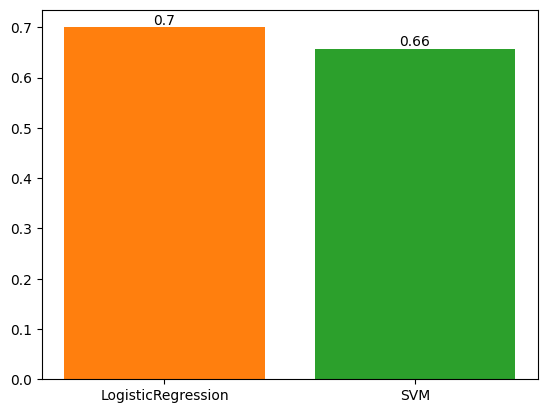

In [134]:
display_shares_guesses(["LogisticRegression", "SVM"], 0, "artist", 10)

[1.1428571428571428, 1.2142857142857144]


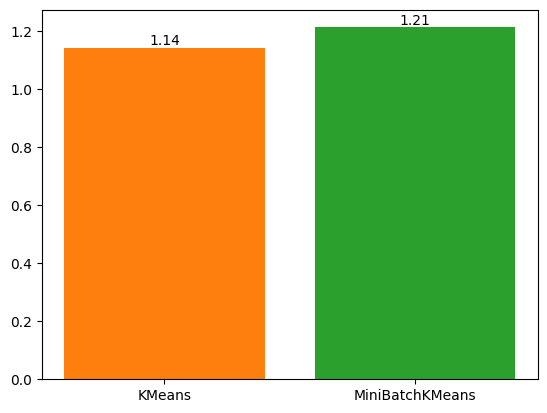

In [138]:
display_shares_guesses(["KMeans", "MiniBatchKMeans"], 0, "artist", 10)

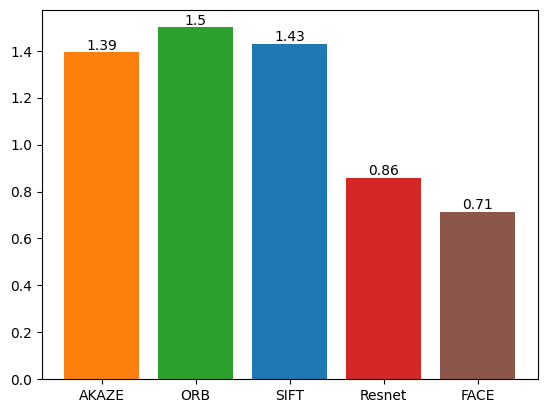

In [136]:
display_shares_guesses(["AKAZE", "ORB", "SIFT", "Resnet", "FACE"], 0, "artist", 4)

### Распределения определения второго класса

In [139]:
def display_shares_guesses(
    keys: list[str],
    painting_number: int,
    mean: str,
    count: int
) -> None:
    
    fig, ax = plt.subplots()
    number_guesses = dict.fromkeys(keys, 0)
    colors = ['tab:orange', 'tab:green', 'tab:blue', "tab:red", "tab:brown"]
    color_index = 0
    
    for link in links:
        type_model = None
        for key in keys:
            if key in link.replace(".json", "").split("_"):
                type_model = key
                break
        
        if "GradientBoosting" in link: continue
            
        with open(f"{PATH}\\{link}", "r") as file:
            data = json.load(file)
            number_guesses[type_model] += data['testing']['accurancy second class']
                
    proportion_guesses = [value / count for value in number_guesses.values()]
    print(proportion_guesses)
    
    for i, (key, value) in enumerate(zip(keys, proportion_guesses)):
        ax.bar(key, value, color=colors[color_index % len(colors)])
        ax.text(i, value + 10**(-5), str(round(value, 2)), ha='center', va='bottom')
        color_index += 1
        
    ax.set_xticks(range(len(keys)))
    ax.set_xticklabels(keys)


[0.7, 0.6571428571428571]


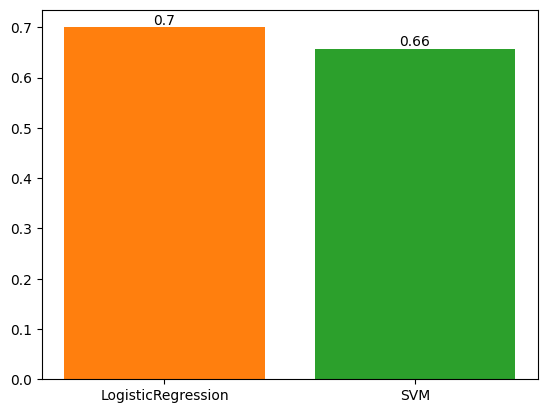

In [140]:
display_shares_guesses(["LogisticRegression", "SVM"], 0, "artist", 10)

[0.6428571428571429, 0.7142857142857142]


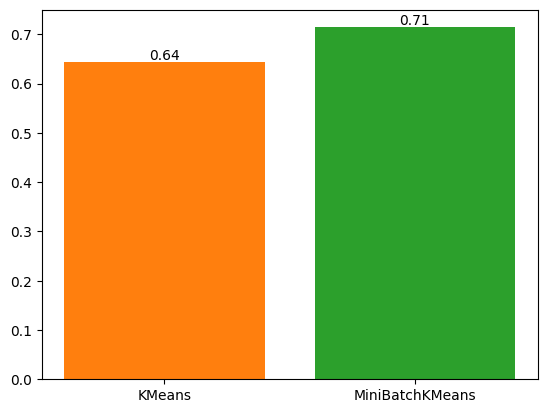

In [141]:
display_shares_guesses(["KMeans", "MiniBatchKMeans"], 0, "artist", 10)

[0.8928571428571429, 1.0, 0.9285714285714286, 0.3571428571428571, 0.21428571428571427]


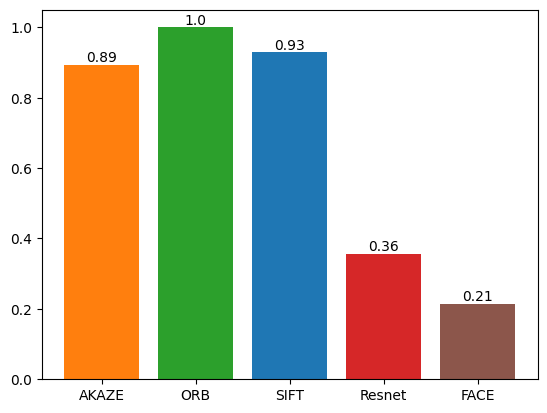

In [142]:
display_shares_guesses(["AKAZE", "ORB", "SIFT", "Resnet", "FACE"], 0, "artist", 4)